# Import and prep CSSE time series data

This notebook does the following:

* downloads lates time series data from https://github.com/CSSEGISandData/COVID-19
* does a bunch of data wrangling to create global as well as US datasets (at county and state level) that are amenable to analysis
* all dataframes are created both in semi-wide and long forms. The semi-wide forms have been date melted but contain separate columns for confirmed, deaths, and recovered. The long forms are measure melted in addition to date melted.
* csvs explorted to path of your choosing
* basic line plot at bottom for demo.

Would love if someone would go through this to confirm all is well.


In [1]:
# Set your data export path to location where exported csvs will go.
data_export_path = './myc19data/'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

Optional imports

In [3]:
# Optional
import us # US states and metadata

List of state names

In [4]:
# states = [s.name for s in us.states.STATES] # Using us package (pip install us)
states = ['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

# Following is from https://gist.githubusercontent.com/rogerallen/1583593/raw/e78a0c47bac18ce810ae3b75a32b102435413128/us_state_abbrev.py
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [5]:
%matplotlib inline

## Import raw data
The read csv statements below directly access the raw data residing on Github. I've also cloned the repo and can do a `git pull` to update my local copy of the entire repo. However, that is **NOT** necessary to use this notebook.

In [6]:
# Note use of raw.githubusercontent.com/. You can see this by clicking the Raw
# button in GitHub for the csv file.
CSSE_ts_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_raw_df = pd.read_csv('{}time_series_19-covid-Confirmed.csv'.format(CSSE_ts_path))
deaths_raw_df = pd.read_csv('{}time_series_19-covid-Deaths.csv'.format(CSSE_ts_path))
recovered_raw_df = pd.read_csv('{}time_series_19-covid-Recovered.csv'.format(CSSE_ts_path))

In [7]:
confirmed_raw_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [8]:
deaths_raw_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,3


In [9]:
recovered_raw_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,96,97,105,105,109,114,114,114,124
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,26,35,42,42,49,60,75,87


## Wide to long, datatype conversions and table merge

Convert to long format so that dates are in a single column and make sure datatype for that column is `datetime`. Then we'll join the three dataframes into one that has separate columns for confirmed, deaths, and recovered.

In [10]:
confirmed_df = pd.melt(confirmed_raw_df, 
                       id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                       var_name='date', value_name='confirmed')

deaths_df = pd.melt(deaths_raw_df, 
                       id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                       var_name='date', value_name='deaths')

recovered_df = pd.melt(deaths_raw_df, 
                       id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                       var_name='date', value_name='recovered')

# Change date column from string to datetime
confirmed_df['date'] = pd.to_datetime(confirmed_df['date'])
deaths_df['date'] = pd.to_datetime(deaths_df['date'])
recovered_df['date'] = pd.to_datetime(recovered_df['date'])

# Join dataframes
c19cases_df = confirmed_df.merge(deaths_df, how='left', 
                  on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date']).merge(
                      recovered_df, how='left', 
                      on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'])



### Number of dates in dataset
Let's see how many dates are in the datasets and the date range.

In [11]:
num_dates = c19cases_df['date'].describe()['unique']
print('{} unique dates'.format(num_dates))
date_stats = c19cases_df['date'].describe()
print(date_stats)

59 unique dates
count                   28143
unique                     59
top       2020-01-25 00:00:00
freq                      477
first     2020-01-22 00:00:00
last      2020-03-20 00:00:00
Name: date, dtype: object


In [12]:
# Add integer day column for simple x-axis 
d0 = date_stats['first']
c19cases_df['day'] = c19cases_df.loc[:, 'date'].map(lambda x: (x - d0).days)

In [13]:
c19cases_df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [14]:
c19cases_df.tail()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day
28138,Sint Maarten,Netherlands,18.0425,-63.0548,2020-03-20,1,0,0,58
28139,NaN,Niger,17.6078,8.0817,2020-03-20,1,0,0,58
28140,NaN,Papua New Guinea,-6.3150,143.9555,2020-03-20,1,0,0,58
28141,Isle of Man,United Kingdom,54.2361,-4.5481,2020-03-20,1,0,0,58
28142,NaN,Zimbabwe,-20.0000,30.0000,2020-03-20,1,0,0,58


In [15]:
print(confirmed_df.info())
print(deaths_df.info())
print(recovered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19116 non-null  object        
 1   Country/Region  28143 non-null  object        
 2   Lat             28143 non-null  float64       
 3   Long            28143 non-null  float64       
 4   date            28143 non-null  datetime64[ns]
 5   confirmed       28143 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19116 non-null  object        
 1   Country/Region  28143 non-null  object        
 2   Lat             28143 non-null  float64       
 3   Long            2

In [16]:
print(confirmed_df.head())
print(deaths_df.head())
print(recovered_df.head())

  Province/State Country/Region      Lat      Long       date  confirmed
0            NaN       Thailand  15.0000  101.0000 2020-01-22          2
1            NaN          Japan  36.0000  138.0000 2020-01-22          2
2            NaN      Singapore   1.2833  103.8333 2020-01-22          0
3            NaN          Nepal  28.1667   84.2500 2020-01-22          0
4            NaN       Malaysia   2.5000  112.5000 2020-01-22          0
  Province/State Country/Region      Lat      Long       date  deaths
0            NaN       Thailand  15.0000  101.0000 2020-01-22       0
1            NaN          Japan  36.0000  138.0000 2020-01-22       0
2            NaN      Singapore   1.2833  103.8333 2020-01-22       0
3            NaN          Nepal  28.1667   84.2500 2020-01-22       0
4            NaN       Malaysia   2.5000  112.5000 2020-01-22       0
  Province/State Country/Region      Lat      Long       date  recovered
0            NaN       Thailand  15.0000  101.0000 2020-01-22        

## Export full dataset if desired

While you can certainly export the `c19cases_df` dataframe, it's awkard to work with since it combines, for example, county level and state level data in the US. So, you need to be careful with aggretations. Instead, since I'm working on US based projects right now, I'm going to create US specific versions at the county and state (and other) levels.

In [17]:
c19cases_df.to_csv("{}c19cases_df.csv".format(data_export_path))

## Creating US datasets

Let's try to create a US version with at both state and county levels. Plan is

- filter first to get cases where ['Country/Region'] == 'US'
- get separate dfs for state level rows and for those with county ids
- check for the "others" like 'Diamond Princess'
- confirm we've partitioned the data correctly in that county+state+other=us in terms of total recs and indexes

In [18]:
c19_us_all = c19cases_df.loc[c19cases_df['Country/Region'] == 'US']

### County level dataset

Now use regex to find Province/State values that look like county ids such as 'Oakland, MI'. First, I'll demo it and then use it.

In [19]:
# Demo to see if seems to work
c19_us_all[c19_us_all['Province/State'].str.match('[\w\s]+,\s[A-Z]{2}')]

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day
209,"Kitsap, WA",US,47.6477,-122.6413,2020-01-22,0,0,0,0
210,"Solano, CA",US,38.3105,-121.9018,2020-01-22,0,0,0,0
211,"Santa Cruz, CA",US,37.0454,-121.9580,2020-01-22,0,0,0,0
212,"Napa, CA",US,38.5025,-122.2654,2020-01-22,0,0,0,0
213,"Ventura, CA",US,34.3705,-119.1391,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
28061,"Socorro, NM",US,33.8837,-106.7235,2020-03-20,0,0,0,58
28062,"Bernalillo, NM",US,35.0178,-106.6291,2020-03-20,0,0,0,58
28063,"Oakland, MI",US,42.5922,-83.3362,2020-03-20,0,0,0,58
28064,"Wayne, MI",US,42.2791,-83.3362,2020-03-20,0,0,0,58


In [20]:
# Create county level dataframe
c19_us_county = c19_us_all.loc[c19_us_all['Province/State'].str.match("[\w\s\.']+,\s[A-Z\.]{2}")]

### State level dataset

To get the state entries I'm checking to see if Province/State exactly matches one of the state names which I've stored in a list called (of, course) `states`. See cell near top of notebook to see how I did this using the awesome [us package](https://pypi.org/project/us/).

In [21]:
# Example
c19_us_all[c19_us_all['Province/State'].isin(['Michigan'])]

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day
146,Michigan,US,43.3266,-84.5361,2020-01-22,0,0,0,0
623,Michigan,US,43.3266,-84.5361,2020-01-23,0,0,0,1
1100,Michigan,US,43.3266,-84.5361,2020-01-24,0,0,0,2
1577,Michigan,US,43.3266,-84.5361,2020-01-25,0,0,0,3
2054,Michigan,US,43.3266,-84.5361,2020-01-26,0,0,0,4
2531,Michigan,US,43.3266,-84.5361,2020-01-27,0,0,0,5
3008,Michigan,US,43.3266,-84.5361,2020-01-28,0,0,0,6
3485,Michigan,US,43.3266,-84.5361,2020-01-29,0,0,0,7
3962,Michigan,US,43.3266,-84.5361,2020-01-30,0,0,0,8
4439,Michigan,US,43.3266,-84.5361,2020-01-31,0,0,0,9


In [22]:
# Create state level dataframe
c19_us_state = c19_us_all.loc[c19_us_all['Province/State'].isin(states)]



### Number of dates in dataset
Let's see how many dates are in the datasets and the date range.

In [23]:
num_dates = c19_us_all['date'].describe()['unique']
print('{} unique dates'.format(num_dates))
c19_us_all['date'].describe()

59 unique dates


count                   14573
unique                     59
top       2020-02-12 00:00:00
freq                      247
first     2020-01-22 00:00:00
last      2020-03-20 00:00:00
Name: date, dtype: object

### Accounting for US records that aren't a county or have no state level record
There are a handful of records related to things like US territories and cruise ships.

In [24]:
print("Total recs in cs19_us_all: {}".format(c19_us_all.index.size))
print("Total recs in c19_us_county: {}".format(c19_us_county.index.size))
print("Total recs in c19_us_state: {}".format(c19_us_state.index.size))

tot_us_recs = c19_us_all.index.size
tot_county_recs = c19_us_county.index.size
tot_state_recs = c19_us_state.index.size

print('tot - county - state = {}'.format(tot_us_recs - tot_county_recs - tot_state_recs))

Total recs in cs19_us_all: 14573
Total recs in c19_us_county: 11269
Total recs in c19_us_state: 3009
tot - county - state = 295


To find the "other" records I'm going to use  Python `set` data structures to make it easy to do things like unions and set differences. 

In [25]:
set_all = set(c19_us_all['Province/State'])
set_county = set(c19_us_county['Province/State'])
set_state = set(c19_us_state['Province/State'])

set_other = set_all - set_county - set_state
tot_other_recs = c19_us_all[c19_us_all['Province/State'].isin(set_other)].index.size
print(set_other)

{'Guam', 'Virgin Islands', 'Grand Princess', 'Diamond Princess', 'Puerto Rico'}


In [26]:
# Here's what the other records look like.
c19_us_other = c19_us_all.loc[c19_us_all['Province/State'].isin(set_other)]
c19_us_other

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0,0,0,0
103,Grand Princess,US,37.6489,-122.6655,2020-01-22,0,0,0,0
417,Puerto Rico,US,18.2208,-66.5901,2020-01-22,0,0,0,0
431,Guam,US,13.4443,144.7937,2020-01-22,0,0,0,0
448,Virgin Islands,US,18.3358,-64.8963,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
27768,Diamond Princess,US,35.4437,139.6380,2020-03-20,49,0,0,58
27769,Grand Princess,US,37.6489,-122.6655,2020-03-20,23,0,0,58
28083,Puerto Rico,US,18.2208,-66.5901,2020-03-20,14,0,0,58
28097,Guam,US,13.4443,144.7937,2020-03-20,14,0,0,58


Now do a bunch of `assert`s to make sure we've partitioned things correctly - didn't lose anything and didn't duplicate anything. If any of these fail, it will raise and error and we can track it down.

In [27]:
# Ensure we've exhaustively and uniquely partitioned the data US data into three different dataframes
# corresponding to county level, state level, and other (cruise ships and territories and anything else)
assert(set_all == set_county | set_state | set_other)
assert(tot_us_recs == (tot_county_recs + tot_state_recs + tot_other_recs))

# Make sure number of records in each dataset jives with number of dates
assert(tot_county_recs == len(set_county) * num_dates)
assert(tot_state_recs == len(set_state) * num_dates)
assert(tot_other_recs == len(set_other) * num_dates)
assert(tot_us_recs == len(set_all) * num_dates)



### Some column name wrangling

* In state table, rename 'Province/State' as 'State'.
* In county table, create new 'State' field by parsing 'Province/State'. We'll 'Province/State' in and will not create a county field to avoid possible confusion caused by same county names in different states. 
* In doing the county column wrangling going to be getting a "view vs copy" warning but we aren't making changes other than adding entire new columns. So, should be safe.

In [28]:
# State 
c19_us_state = c19_us_state.rename(columns={"Province/State": "State"})
# Add state abbreviation
c19_us_state.loc[:, 'StateAbbrev'] = c19_us_state.loc[:, 'State'].map(lambda x: us_state_abbrev[x])
c19_us_state.head()

,State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day,StateAbbrev
98,Washington,US,47.4009,-121.4905,2020-01-22,0,0,0,0,WA
99,New York,US,42.1657,-74.9481,2020-01-22,0,0,0,0,NY
100,California,US,36.1162,-119.6816,2020-01-22,0,0,0,0,CA
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0,0,0,0,MA
104,Georgia,US,33.0406,-83.6431,2020-01-22,0,0,0,0,GA


In [29]:
c19_us_county

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day
209,"Kitsap, WA",US,47.6477,-122.6413,2020-01-22,0,0,0,0
210,"Solano, CA",US,38.3105,-121.9018,2020-01-22,0,0,0,0
211,"Santa Cruz, CA",US,37.0454,-121.9580,2020-01-22,0,0,0,0
212,"Napa, CA",US,38.5025,-122.2654,2020-01-22,0,0,0,0
213,"Ventura, CA",US,34.3705,-119.1391,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
28061,"Socorro, NM",US,33.8837,-106.7235,2020-03-20,0,0,0,58
28062,"Bernalillo, NM",US,35.0178,-106.6291,2020-03-20,0,0,0,58
28063,"Oakland, MI",US,42.5922,-83.3362,2020-03-20,0,0,0,58
28064,"Wayne, MI",US,42.2791,-83.3362,2020-03-20,0,0,0,58


Now try to pluck out the state abbreviation and put in new column. I keep getting the `SettingWithCopyWarning` even though I'm using the `.loc()` indexer. Maybe it's because of all the function chaining in the lambda function but it's just string work. Results look fine.

In [30]:
c19_us_county.loc[:, 'StateAbbrev'] = c19_us_county.loc[:, 'Province/State'].map(lambda x: x.split(',')[1].strip().replace('.',''))


/home/mark/anaconda3/envs/mychime/lib/python3.8/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mark/anaconda3/envs/mychime/lib/python3.8/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Now can add State field by using the `abbrev_us_state` dictionary from top of notebook. Again, geting `SettingWithCopyWarning`. If anyone sees a better way to do this, let me know. Results look fine.

In [31]:
c19_us_county.loc[:, 'State'] = c19_us_county.loc[:, 'StateAbbrev'].map(lambda x: abbrev_us_state[x])

In [32]:
c19_us_county.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,day,StateAbbrev,State
209,"Kitsap, WA",US,47.6477,-122.6413,2020-01-22,0,0,0,0,WA,Washington
210,"Solano, CA",US,38.3105,-121.9018,2020-01-22,0,0,0,0,CA,California
211,"Santa Cruz, CA",US,37.0454,-121.9580,2020-01-22,0,0,0,0,CA,California
212,"Napa, CA",US,38.5025,-122.2654,2020-01-22,0,0,0,0,CA,California
213,"Ventura, CA",US,34.3705,-119.1391,2020-01-22,0,0,0,0,CA,California


In [33]:
c19_us_county.groupby(['StateAbbrev', 'State']).size()

StateAbbrev  State               
AZ           Arizona                  177
CA           California              1534
CO           Colorado                 531
CT           Connecticut              118
DC           District of Columbia      59
DE           Delaware                  59
FL           Florida                  767
GA           Georgia                  531
HI           Hawaii                    59
IA           Iowa                     118
IL           Illinois                 236
IN           Indiana                  472
KS           Kansas                    59
KY           Kentucky                 177
LA           Louisiana                118
MA           Massachusetts            354
MD           Maryland                 177
MI           Michigan                 118
MN           Minnesota                236
MO           Missouri                  59
NC           North Carolina           177
NE           Nebraska                 118
NH           New Hampshire            118


In [34]:
print(c19_us_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14573 entries, 98 to 28114
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14573 non-null  object        
 1   Country/Region  14573 non-null  object        
 2   Lat             14573 non-null  float64       
 3   Long            14573 non-null  float64       
 4   date            14573 non-null  datetime64[ns]
 5   confirmed       14573 non-null  int64         
 6   deaths          14573 non-null  int64         
 7   recovered       14573 non-null  int64         
 8   day             14573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.1+ MB
None


In [35]:
print(c19_us_state.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 98 to 28080
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   State           3009 non-null   object        
 1   Country/Region  3009 non-null   object        
 2   Lat             3009 non-null   float64       
 3   Long            3009 non-null   float64       
 4   date            3009 non-null   datetime64[ns]
 5   confirmed       3009 non-null   int64         
 6   deaths          3009 non-null   int64         
 7   recovered       3009 non-null   int64         
 8   day             3009 non-null   int64         
 9   StateAbbrev     3009 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 258.6+ KB
None


In [36]:
print(c19_us_county.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 209 to 28065
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11269 non-null  object        
 1   Country/Region  11269 non-null  object        
 2   Lat             11269 non-null  float64       
 3   Long            11269 non-null  float64       
 4   date            11269 non-null  datetime64[ns]
 5   confirmed       11269 non-null  int64         
 6   deaths          11269 non-null  int64         
 7   recovered       11269 non-null  int64         
 8   day             11269 non-null  int64         
 9   StateAbbrev     11269 non-null  object        
 10  State           11269 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.0+ MB
None


## Create long versions
For plotting, it's often convenient to have all measures melted into a single column. In our case, I want a long version that has ['confirmed', 'deaths', 'recovered'] melted to make it easy to do multiline plots.

In [37]:
c19_us_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 209 to 28065
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11269 non-null  object        
 1   Country/Region  11269 non-null  object        
 2   Lat             11269 non-null  float64       
 3   Long            11269 non-null  float64       
 4   date            11269 non-null  datetime64[ns]
 5   confirmed       11269 non-null  int64         
 6   deaths          11269 non-null  int64         
 7   recovered       11269 non-null  int64         
 8   day             11269 non-null  int64         
 9   StateAbbrev     11269 non-null  object        
 10  State           11269 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.0+ MB


In [38]:
c19_us_county_long = pd.melt(c19_us_county, 
  id_vars=['Province/State', 'Country/Region', 'Lat', 'Long', 'date', 'day', 'State', 'StateAbbrev'],
                       value_vars=['confirmed', 'deaths', 'recovered'],
                       var_name='measure', value_name='cases')

c19_us_state_long = pd.melt(c19_us_state,
        id_vars=['State', 'Country/Region', 'Lat', 'Long', 'date', 'day', 'StateAbbrev'],
                       value_vars=['confirmed', 'deaths', 'recovered'],
                       var_name='measure', value_name='cases')

c19_us_all_long = pd.melt(c19_us_all, 
     id_vars=['Province/State', 'Country/Region', 'Lat', 'Long', 'date', 'day'],
                       value_vars=['confirmed', 'deaths', 'recovered'],
                       var_name='measure', value_name='cases')

c19_us_all_other = pd.melt(c19_us_other, 
     id_vars=['Province/State', 'Country/Region', 'Lat', 'Long', 'date', 'day'],
                       value_vars=['confirmed', 'deaths', 'recovered'],
                       var_name='measure', value_name='cases')

In [39]:
c19_us_state_long

,State,Country/Region,Lat,Long,date,day,StateAbbrev,measure,cases
0,Washington,US,47.4009,-121.4905,2020-01-22,0,WA,confirmed,0
1,New York,US,42.1657,-74.9481,2020-01-22,0,NY,confirmed,0
2,California,US,36.1162,-119.6816,2020-01-22,0,CA,confirmed,0
3,Massachusetts,US,42.2302,-71.5301,2020-01-22,0,MA,confirmed,0
4,Georgia,US,33.0406,-83.6431,2020-01-22,0,GA,confirmed,0
...,...,...,...,...,...,...,...,...,...
9022,North Dakota,US,47.5289,-99.7840,2020-03-20,58,ND,recovered,0
9023,South Dakota,US,44.2998,-99.4388,2020-03-20,58,SD,recovered,1
9024,West Virginia,US,38.4912,-80.9545,2020-03-20,58,WV,recovered,0
9025,Wyoming,US,42.7560,-107.3025,2020-03-20,58,WY,recovered,0


## Export results

In [40]:
# Regular versions
c19_us_county.to_csv("{}c19_us_county.csv".format(data_export_path), index=False)
c19_us_state.to_csv("{}c19_us_state.csv".format(data_export_path), index=False)
c19_us_all.to_csv("{}c19_us_all.csv".format(data_export_path), index=False)

# Long versions
c19_us_county_long.to_csv("{}c19_us_county_long.csv".format(data_export_path), index=False)
c19_us_state_long.to_csv("{}c19_us_state_long.csv".format(data_export_path), index=False)
c19_us_all_long.to_csv("{}c19_us_all_long.csv".format(data_export_path), index=False)

## Sample plots

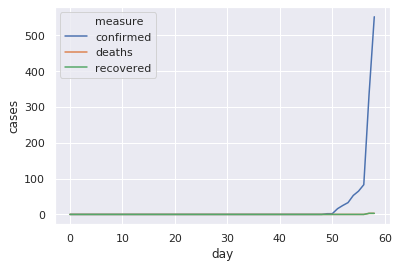

In [41]:
sns.lineplot(x='day', y='cases', hue='measure', 
             data=c19_us_state_long.loc[c19_us_state_long['State'] == 'Michigan']);